In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:27
🔁 Restarting kernel...


In [ ]:
!conda --version

conda 23.11.0


In [ ]:
from keras import *
from PIL import Image
from keras.models import *
from keras.layers import Input, Dense
# from keras.preprocessing import image
import keras.utils as image
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
#from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
import glob
import os.path
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/dataset2/train')

['Tinea Ringworm Candidiasis and other Fungal Infections',
 'Melanoma Skin Cancer Nevi and Moles']

In [ ]:
categorie = ['Tinea Ringworm Candidiasis and other Fungal Infections',
 'Melanoma Skin Cancer Nevi and Moles']

In [ ]:
def load_data(path):
    x_train = []
    y_train = []

    images = glob.glob(path+"/**/*")
    for photo in images:
        img = image.load_img(photo, target_size=(224, 224))
        tr_x = image.img_to_array(img)
        tr_x = preprocess_input(tr_x)
        label = (photo.split("/"))[-2]
        label_place = categorie.index(label)

        x_train.append(tr_x)
        y_train.append(label_place)

    return np.array(x_train), to_categorical(y_train)

In [ ]:
X_train, Y_train = load_data("/content/drive/MyDrive/dataset2/train")

In [ ]:
X_test, Y_test = load_data("/content/drive/MyDrive/dataset2/test")

In [ ]:
print(type(Y_train))
print(Y_train.shape)    # 808,4
print(X_train.shape)    # 808,299,299,3

<class 'numpy.ndarray'>
(1763, 2)
(1763, 224, 224, 3)


In [ ]:
print(Y_test.shape)    # 808,4
print(X_test.shape)    # 808,299,299,3

(441, 2)
(441, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

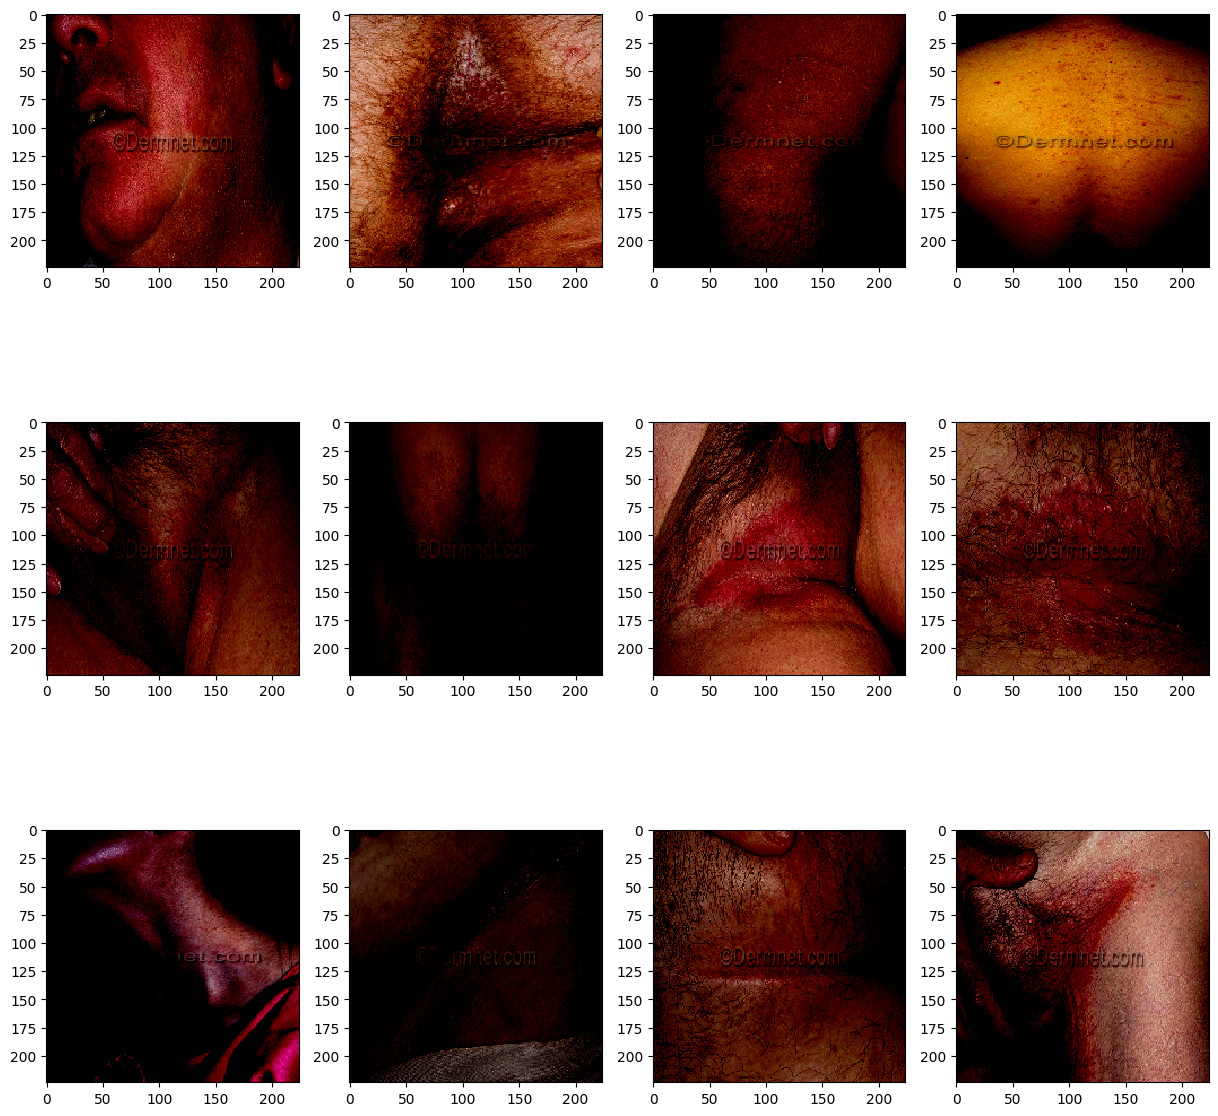

In [ ]:
# Display Some Images
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    # ax.title.set_text(Y_train[i])
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [ ]:
input = Input(shape=(224, 224, 3))

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout

inception = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = inception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(len(categorie), activation="softmax")(outputs)

model = Model(inputs=inception.input, outputs=outputs)

for layer in inception.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Data Generator
# Fine-tuning
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),
    metrics=['accuracy']
)

train_datagen = ImageDataGenerator(
    rotation_range=45,
    horizontal_flip=True
)
BATCH_SIZE = 64

train_generator = ImageDataGenerator(
        rotation_range = 45 ,
        horizontal_flip=True,
    )

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='inception_best_model.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

# Train the model with the ModelCheckpoint callback
history = model.fit(train_generator.flow(X_train, Y_train),
                    batch_size=10,
                    epochs=10,
                    shuffle=True,
                    validation_data=(X_test, Y_test),
                    callbacks=[checkpoint],
                    verbose=1)


Epoch 1/10
56/56 [==============================] - ETA: 0s - loss: 0.9673 - categorical_accuracy: 0.8281
Epoch 1: val_loss improved from inf to 0.54577, saving model to inception_best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 [==============================] - 353s 6s/step - loss: 0.9673 - categorical_accuracy: 0.8281 - val_loss: 0.5458 - val_categorical_accuracy: 0.8844
Epoch 2/10
56/56 [==============================] - ETA: 0s - loss: 0.4089 - categorical_accuracy: 0.9217
Epoch 2: val_loss did not improve from 0.54577
56/56 [==============================] - 342s 6s/step - loss: 0.4089 - categorical_accuracy: 0.9217 - val_loss: 0.7945 - val_categorical_accuracy: 0.9048
Epoch 3/10
56/56 [==============================] - ETA: 0s - loss: 0.2321 - categorical_accuracy: 0.9155
Epoch 3: val_loss did not improve from 0.54577
56/56 [==============================] - 336s 6s/step - loss: 0.2321 - categorical_accuracy: 0.9155 - val_loss: 1.5105 - val_categorical_accuracy: 0.9070
Epoch 4/10
56/56 [==============================] - ETA: 0s - loss: 0.1489 - categorical_accuracy: 0.9421
Epoch 4: val_loss did not improve from 0.54577
56/56 [==============================] - 341s 6s/step - loss: 0.1489 - categori

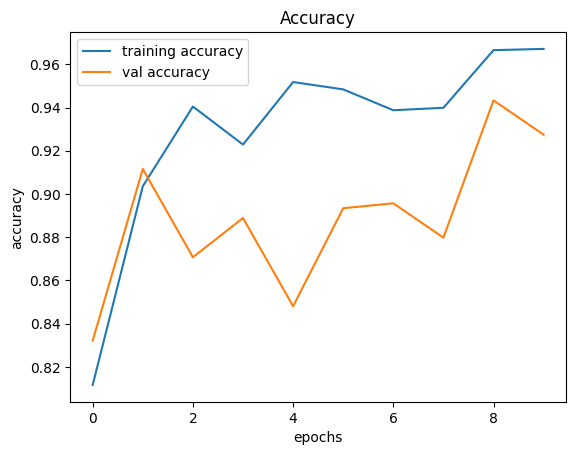

In [ ]:
# accuracy
plt.figure(0)
plt.plot(history.history['categorical_accuracy'], label='training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

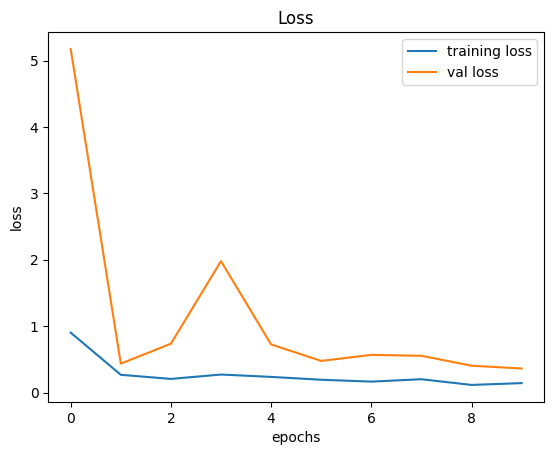

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
vgg_loaded_model = load_model('/content/inception_best_model.h5')

In [ ]:
y_pred=vgg_loaded_model.predict(X_test)
y_pred = (y_pred > 0.45)
score=accuracy_score(y_pred,Y_test)
print(score*100 ,' % Accuracy')

14/14 [==============================] - 62s 4s/step
91.38321995464852  % Accuracy
